# La santé mentale et le travail, problématique :

- - Comment la situation de travail influence-t-elle la santé mentale des gens et leur aptitude à se confier sur leur état ?



## Les employés
Tout d'abord, intéressons nous à la proportion Homme/Femme ayant répondu à l'enquête (Par souci de lisibilité on ne prendra que les personnes ayant répondu male/female).
On voit qu'une grande majorité d'hommes ont répondu. 

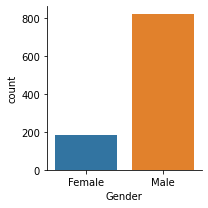

In [71]:
df = pd.read_csv('C:/Users/kris.amiot/Desktop/M1 Hitema/H3-Python/MentalHealthDS/survey.csv')
df['Gender'] = df['Gender'].replace({'male': "Male", 'female': "Female"})
df['time']=pd.to_datetime(df['Timestamp'])
df['dates'] = df['time'].dt.date
data=df.loc[(df["Gender"] == "Male") | (df["Gender"] == "Female" )]
data2= data.loc[(data['Age'] > 0)]

g = sns.catplot(
    data=data, kind="count",
    x="Gender", height = 3

)



### Le télétravail et la prise d'informations des employés
Dans un premier temps, analysons les personnes selon leur part de télétravail (plus ou moins de 50%), ainsi que les cas où les personnes savent ou non si leurs employeurs accordent des bénéfices en faveur de la santé mentale. Voyons si selon ces critères, les personnes ont oui ou non suivi un traitement contre un trouble mental.

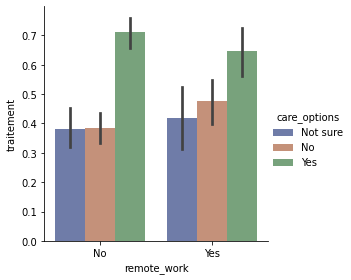

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('survey.csv')
df['traitement'] = df['treatment'].replace({'Yes': 1, 'No': 0})
g = sns.catplot(
    data=df, kind="bar",
    x="remote_work", y="traitement", hue="care_options",
    palette="dark", alpha=.6, height=4

)

Ce graphique représente le taux de personnes ayant suivi un traitement contre un trouble mental, en fonction de leur méthode de travail dominante (télétravail ou non), tout en se posant la question de si leur employeur accordent des bénéfices concernant la santé mentale.

Nous pouvons voir que la différence est assez minime en ce qui concerne la méthode de travail, mais on peut tout de même voir qu'en général les personnes ont plus tendance à avoir suivi un traitement lorsqu'ils travaillent à distance plus de 50% du temps.
Le facteur le plus déterminant est le facteur bénéfice accordé par l'entreprise (oui/non/ne sait pas). On voit que lorsque l'entreprise accorde des bénéfices, les gens ont beaucoup plus tendance à suivre un traitement que lorsqu'elle n'en accorde pas. Les personnes ne sachant pas, elles , suivent encore moins un traitement que celles pour lesquelles l'entreprise n'accorde pas de bénéfice, et on pourrait en conjecturer que celà vient d'un manque d'envie ou même d'intérêt.

C:\Users\KRIS~1.AMI\AppData\Local\Temp/ipykernel_11468/3404759844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['supervisor'] = data['supervisor'].replace({'Yes': 1, 'No': 0})


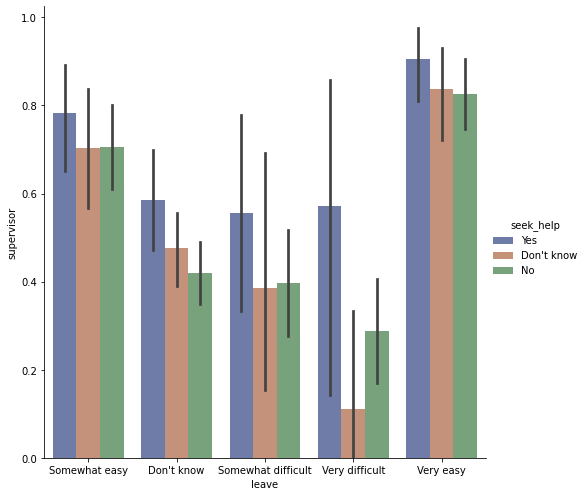

In [170]:
data=df.loc[(df["supervisor"] == "Yes") | (df["supervisor"] == "No" )]
data['supervisor'] = data['supervisor'].replace({'Yes': 1, 'No': 0})
g = sns.catplot(
    data=data, kind="bar",
    x="leave", y="supervisor", hue="seek_help",
    palette="dark", alpha=.6, height=7

)

Sur ce graphique, on voit que les personnes ont beaucoup plus tendance à se confier à leur superviseur sur leurs troubles mentaux dans le cas où l'entreprise permet plus facilement de faire des arrêts maladies dans ce cadre là. On remarque également que celà est vrai lorsque les employés **savent** que leur entreprise fournit des moyens d'accès à des aides, ainsi que des informations sur les troubles mentaux.

## Les entreprises
Nous allons à présent nous intéresser aux entreprises, leur nombre d'employés, ainsi que le taux de traitement en fonction des mesures qu'elles prennent ou non pour leurs employés



C:\Users\KRIS~1.AMI\AppData\Local\Temp/ipykernel_11468/1051549099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['benefits'] = data3['benefits'].replace({'Yes': 1, 'No': 0})


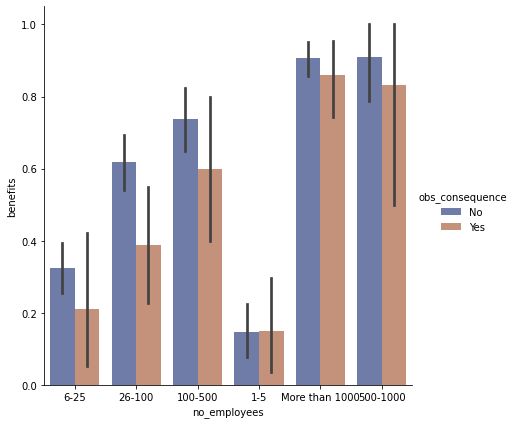

In [165]:
data3=df.loc[(df["benefits"] == "Yes") | (df["benefits"] == "No" )]
data3['benefits'] = data3['benefits'].replace({'Yes': 1, 'No': 0})
dataptdr=df.replace({'True': 1, 'False':0, "Don't know":0, "Yes":1, "No":0, "Never":0, "Rarely":0.25, 
                     "Sometimes":0.5, "Often":0.75, "Somewhat easy": 0.75, "Easy":1, "Somewhat difficult":0.25 })
g = sns.catplot(
    data=data3, kind="bar",
    x="no_employees", y="benefits", hue="obs_consequence"
    , palette="dark", alpha=.6, height=6

)

On peut observer que plus l'entreprise possède d'employés, plus elle aura tendance à accorder des facilités en ce qui concerne la santé mentale de ses employés. Cependant, on remarque que quelquesoit la taille de l'entreprise, celles où l'on observe parfois des conséquences négatives sur le travail liées à la santé mentale d'un employé accordent moins de bénéfices en faveur de la santé mentale. Essayons maintenant de remplacer les bénéfices accordés par des statistiques montrant si des employés parleraient de leurs troubles mentaux à leur employeur actuel, ou à un potentiel nouvel employeur.

C:\Users\KRIS~1.AMI\AppData\Local\Temp/ipykernel_11468/4198010507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['supervisor'] = data['supervisor'].replace({'Yes': 1, 'No': 0})


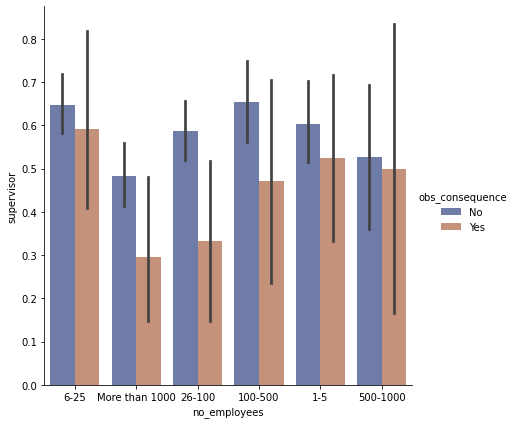

In [145]:
data=df.loc[(df["supervisor"] == "Yes") | (df["supervisor"] == "No" )]
data['supervisor'] = data['supervisor'].replace({'Yes': 1, 'No': 0})
g = sns.catplot(
    data=data, kind="bar",
    x="no_employees", y="supervisor", hue="obs_consequence"
    , palette="dark", alpha=.6, height=6

)

On remarque que les employés auraient plus tendance à parler à leurs responsables si l'on n'observe pas de conséquences négatives sur leur emploi à cause de leur trouble mental. Reprenons maintenant notre analyse non pas en utilisant l'observation de conséquences mais en regardant si les employeurs prennent au sérieux les troubles mentaux.

C:\Users\KRIS~1.AMI\AppData\Local\Temp/ipykernel_11468/2576624741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['supervisor'] = data['supervisor'].replace({'Yes': 1, 'No': 0})


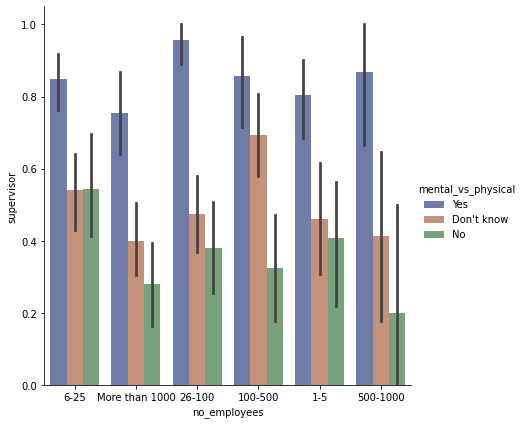

In [147]:
data=df.loc[(df["supervisor"] == "Yes") | (df["supervisor"] == "No" )]
data['supervisor'] = data['supervisor'].replace({'Yes': 1, 'No': 0})
g = sns.catplot(
    data=data, kind="bar",
    x="no_employees", y="supervisor", hue="mental_vs_physical"
    , palette="dark", alpha=.6, height=6

)

On voit nettement que lorsque l'employeur considère les troubles mentaux au même niveau que les troubles physiques, les employés auraient beaucoup plus d'aisance à parler de leurs troubles à leur responsable.

Tous ces graphiques ont eu pour but de nous montrer que l'entreprise a un rôle à jouer dans l'acceptation et la confidence des employés par rapport à leurs troubles mentaux.

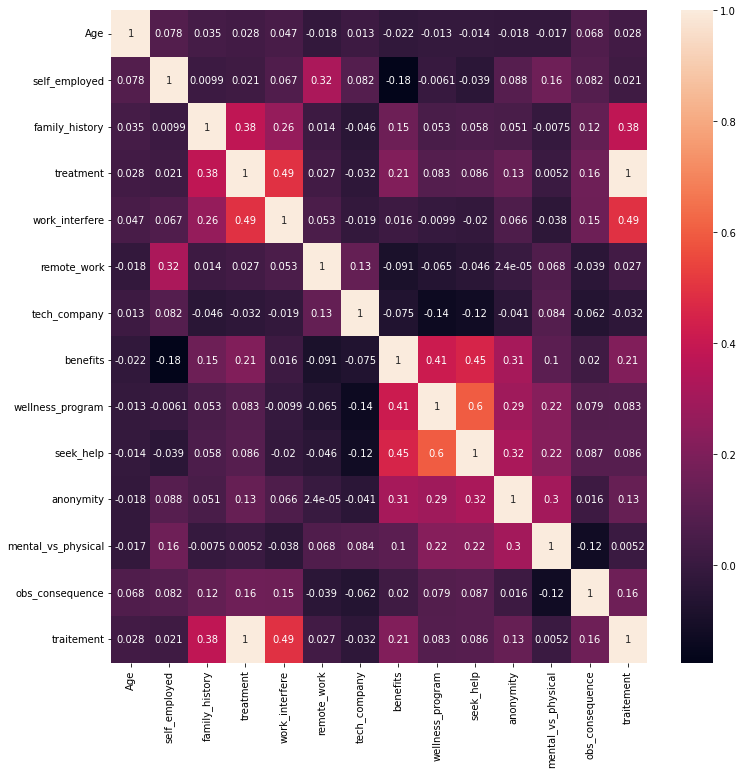

In [166]:
plt.figure(figsize=(12,12))
sns.heatmap(data= dataptdr.corr(), annot=True)
plt.show()